#### Gerekli Kütüphanelerin Eklenmesi

In [189]:
import numpy as np 
import pandas as pd 

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# Tahmin 

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn import tree

#### Veri Seti

In [190]:
df = pd.read_csv("winequality-red.csv")
df.rename(columns={'fixed acidity': 'Sabit Asit', 'volatile acidity': 'Uçucu Asitliği', 'citric acid': 'Sitrik Asit', 'residual sugar': 'Artık Şeker', 'chlorides': 'Klorürler', 'free sulfur dioxide': 'Serbest Sülfür Dioksit', 'total sulfur dioxide': 'Toplam Sülfür Dioksit', 'density': 'Yoğunluk', 'sulphates': 'Sülfatlar', 'alcohol': 'Alkol', 'quality': 'Kalite'}, inplace=True)
df

,Sabit Asit,Uçucu Asitliği,Sitrik Asit,Artık Şeker,Klorürler,Serbest Sülfür Dioksit,Toplam Sülfür Dioksit,Yoğunluk,pH,Sülfatlar,Alkol,Kalite
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [191]:
print(df.isna().sum())

Sabit Asit                0
Uçucu Asitliği            0
Sitrik Asit               0
Artık Şeker               0
Klorürler                 0
Serbest Sülfür Dioksit    0
Toplam Sülfür Dioksit     0
Yoğunluk                  0
pH                        0
Sülfatlar                 0
Alkol                     0
Kalite                    0
dtype: int64


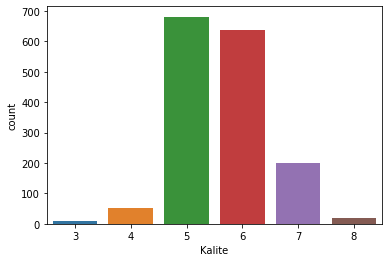

In [192]:
sns.countplot(x="Kalite",data=df)
plt.show()

In [193]:
df.value_counts('Kalite')

Kalite
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

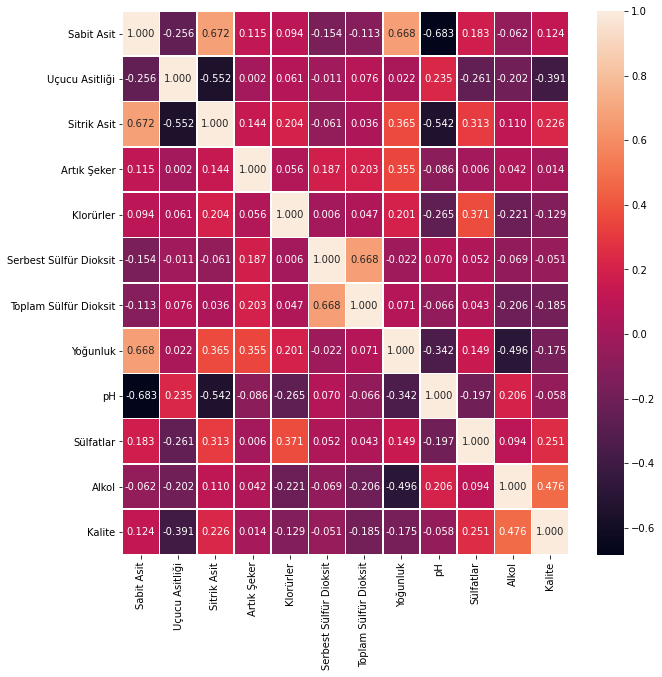

In [194]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.6, fmt= '.3f',ax=ax) 
plt.show()

### Özelliklere Göre Kalite Değeri Grafikleri 

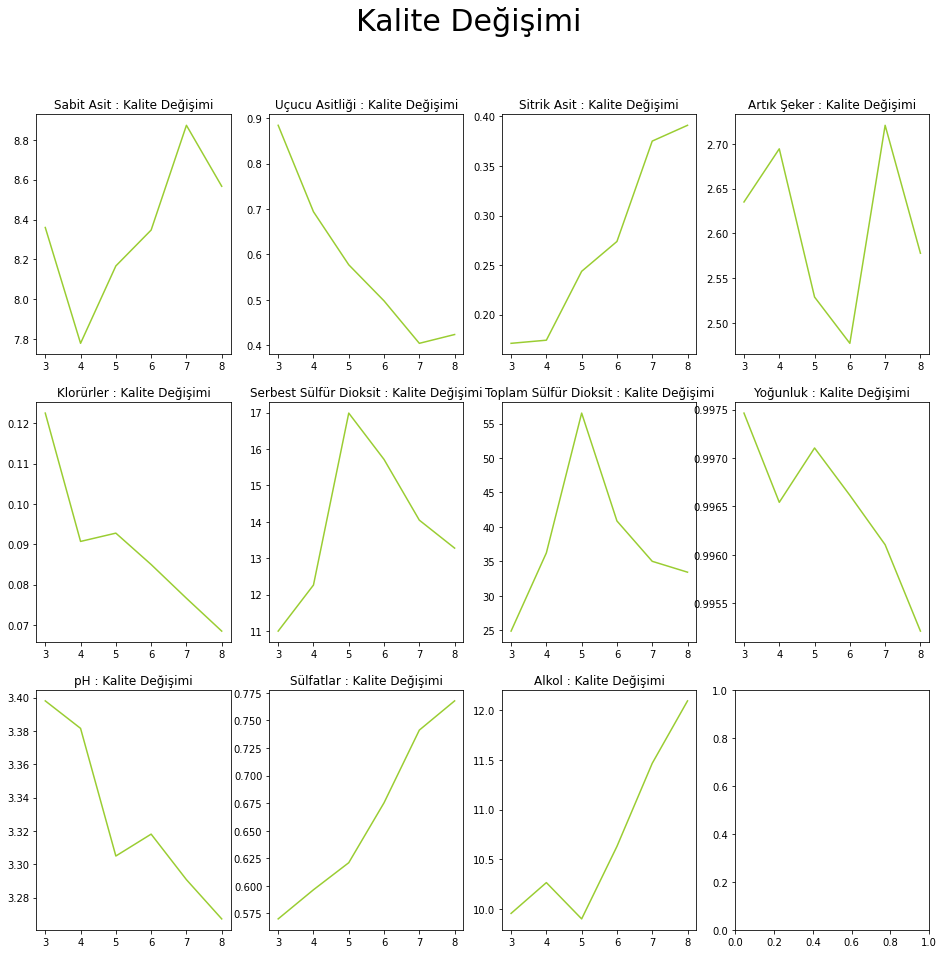

In [195]:
quality=np.arange(3,9,1)
k=1
fig,axes=plt.subplots(3,4,figsize=(16, 15))
fig.suptitle('Kalite Değişimi',fontsize=30)
for column in df.columns:
    if column != 'Kalite':
        arr=[]
        for i in quality:
            xx=df[df['Kalite']==i]
            arr.append(np.mean(xx[column]))   
        plt.subplot(3,4,k)
        plt.plot(quality,arr,color='yellowgreen')
        plt.title(column+' : Kalite Değişimi')
        k+=1   
plt.show()

In [196]:
#Sonuç :

#1. Sitrik asit, sülfatlar ve alkol kalite ile doğru orantılıdır.
#2. Sabit asit yüksek olmalı, çok yüksek olursa da kaliteyi düşürebilir.
#3. Uçucu asitliği, sabit aside göre ters bir davranış gösteriyor.
#4. Klorürler, yoğunluk ve pH kalite ile ters orantılıdır.
#5. Artık şeker,serbest sülfür dioksit ve toplam sülfür dioksit kalite seviyesiyle artan veya azalan bir ilişkiye sahip değiller.
#6. Klorürler ve pH grafikleri benzer şekildedir .
#7. Sülfür ve artık şeker grafikleri ise ters bir yönelimdedir.


In [197]:
dx=df.sample(frac=1)
dx.head()

,Sabit Asit,Uçucu Asitliği,Sitrik Asit,Artık Şeker,Klorürler,Serbest Sülfür Dioksit,Toplam Sülfür Dioksit,Yoğunluk,pH,Sülfatlar,Alkol,Kalite
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,5
814,12.6,0.410,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6
1381,6.8,0.830,0.09,1.8,0.074,4.0,25.0,0.99534,3.38,0.45,9.6,5
571,6.2,0.360,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.7,6
1154,6.6,0.580,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,11.4,6


In [198]:
X_ns=df.drop('Kalite',1)
y_ns=df['Kalite']
X_s=dx.drop('Kalite',1)
y_s=dx['Kalite']


In [199]:
X_train_ns,X_test_ns,y_train_ns,y_test_ns=train_test_split(X_ns,y_ns,test_size=0.2)
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2)


In [200]:
clf=['RFC','SVM','KNN','DT']
sh_tr=[]
sh_ts=[]
ns_tr=[]
ns_ts=[]

#### Random Forest Classifier

In [201]:
model=RandomForestClassifier(random_state=0)

In [202]:
model.fit(X_train_ns,y_train_ns)
print('Karıştırılmamış eğitim verisinin doğruluğu     : ',model.score(X_train_ns,y_train_ns))
print('Karıştırılmamış test verisinin  doğruluğu      : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))


model.fit(X_train_s,y_train_s)
print('Karıştırılmış eğitim verisinin doğruluğu       : ',model.score(X_train_s,y_train_s))
print('Karıştırılmış test verisinin  doğruluğu        : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

Karıştırılmamış eğitim verisinin doğruluğu     :  1.0
Karıştırılmamış test verisinin  doğruluğu      :  0.703125
Karıştırılmış eğitim verisinin doğruluğu       :  1.0
Karıştırılmış test verisinin  doğruluğu        :  0.696875


### Support Vector Machine

In [203]:
model=svm.SVC()

In [204]:
model.fit(X_train_ns,y_train_ns)
print('Karıştırılmamış eğitim verisinin doğruluğu     : ',model.score(X_train_ns,y_train_ns))
print('Karıştırılmamış test verisinin  doğruluğu      : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))




model.fit(X_train_s,y_train_s)
print('Karıştırılmış eğitim verisinin doğruluğu       : ',model.score(X_train_s,y_train_s))
print('Karıştırılmış test verisinin  doğruluğu        : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

Karıştırılmamış eğitim verisinin doğruluğu     :  0.5129007036747459
Karıştırılmamış test verisinin  doğruluğu      :  0.49375
Karıştırılmış eğitim verisinin doğruluğu       :  0.5160281469898358
Karıştırılmış test verisinin  doğruluğu        :  0.4625


### K-Neighbours Classifier

In [205]:
model=KNeighborsClassifier(n_neighbors=6)     

In [208]:
model.fit(X_train_ns,y_train_ns)
print('Karıştırılmamış eğitim verisinin doğruluğu     : ',model.score(X_train_ns,y_train_ns))
print('Karıştırılmamış test verisinin  doğruluğu      : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))



model.fit(X_train_s,y_train_s)
print('Karıştırılmış eğitim verisinin doğruluğu       : ',model.score(X_train_s,y_train_s))
print('Karıştırılmış test verisinin  doğruluğu        : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

Karıştırılmamış eğitim verisinin doğruluğu     :  0.63721657544957
Karıştırılmamış test verisinin  doğruluğu      :  0.490625
Karıştırılmış eğitim verisinin doğruluğu       :  0.6442533229085223
Karıştırılmış test verisinin  doğruluğu        :  0.46875


### Decision Tree Classifier

In [181]:
model=tree.DecisionTreeClassifier()

In [182]:
model.fit(X_train_ns,y_train_ns)
print('Karıştırılmamış eğitim verisinin doğruluğu     : ',model.score(X_train_ns,y_train_ns))
print('Karıştırılmamış test verisinin  doğruluğu      : ',model.score(X_test_ns,y_test_ns))
ns_tr.append(model.score(X_train_ns,y_train_ns))
ns_ts.append(model.score(X_test_ns,y_test_ns))



model.fit(X_train_s,y_train_s)
print('Karıştırılmış eğitim verisinin doğruluğu       : ',model.score(X_train_s,y_train_s))
print('Karıştırılmış test verisinin  doğruluğu        : ',model.score(X_test_s,y_test_s))
sh_tr.append(model.score(X_train_s,y_train_s))
sh_ts.append(model.score(X_test_s,y_test_s))

Karıştırılmamış eğitim verisinin doğruluğu     :  1.0
Karıştırılmamış test verisinin  doğruluğu      :  0.6
Karıştırılmış eğitim verisinin doğruluğu       :  1.0
Karıştırılmış test verisinin  doğruluğu        :  0.634375


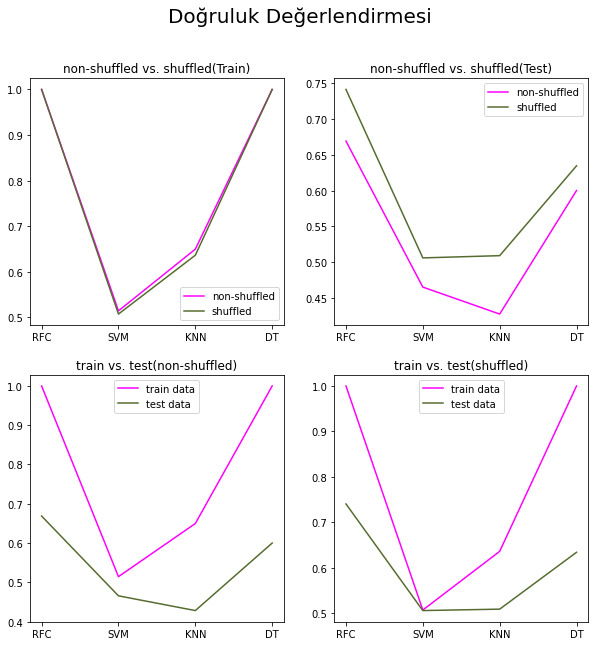

In [183]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Doğruluk Değerlendirmesi',fontsize=20)
plt.subplot(2,2,1)
plt.title('non-shuffled vs. shuffled(Train)')
plt.plot(clf,ns_tr,color='magenta',label='non-shuffled')
plt.plot(clf,sh_tr,color='darkolivegreen',label='shuffled')
plt.legend()
plt.subplot(2,2,2)
plt.title('non-shuffled vs. shuffled(Test)')
plt.plot(clf,ns_ts,color='magenta',label='non-shuffled')
plt.plot(clf,sh_ts,color='darkolivegreen',label='shuffled')
plt.legend()
plt.subplot(2,2,3)
plt.title('train vs. test(non-shuffled)')
plt.plot(clf,ns_tr,color='magenta',label='train data')
plt.plot(clf,ns_ts,color='darkolivegreen',label='test data')
plt.legend()
plt.subplot(2,2,4)
plt.title('train vs. test(shuffled)')
plt.plot(clf,sh_tr,color='magenta',label='train data')
plt.plot(clf,sh_ts,color='darkolivegreen',label='test data')
plt.legend()
plt.show()

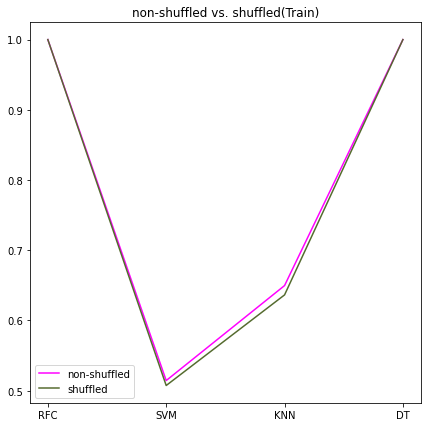

In [184]:
plt.figure(figsize=(7,7))
plt.title('non-shuffled vs. shuffled(Train)')
plt.plot(clf,ns_tr,color='magenta',label='non-shuffled')
plt.plot(clf,sh_tr,color='darkolivegreen',label='shuffled')
plt.legend()

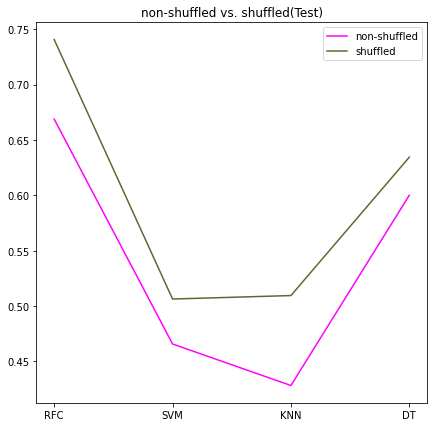

In [185]:
plt.figure(figsize=(7,7))
plt.title('non-shuffled vs. shuffled(Test)')
plt.plot(clf,ns_ts,color='magenta',label='non-shuffled')
plt.plot(clf,sh_ts,color='darkolivegreen',label='shuffled')
plt.legend()

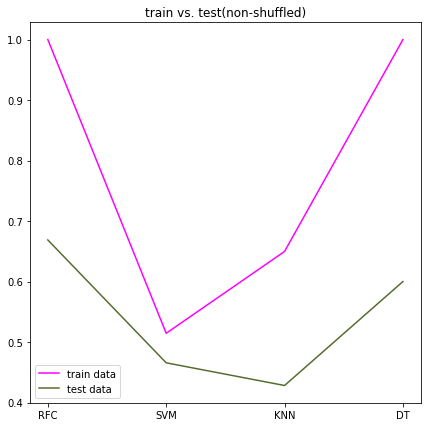

In [186]:
plt.figure(figsize=(7,7))
plt.title('train vs. test(non-shuffled)')
plt.plot(clf,ns_tr,color='magenta',label='train data')
plt.plot(clf,ns_ts,color='darkolivegreen',label='test data')
plt.legend()

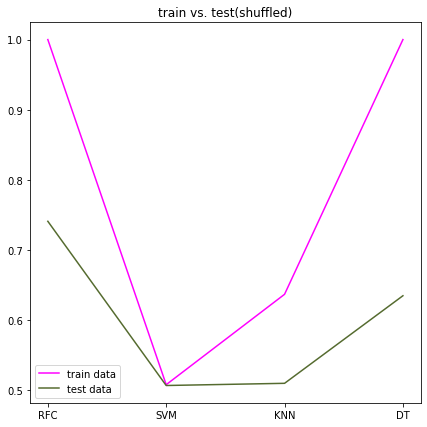

In [187]:
plt.figure(figsize=(7,7))
plt.title('train vs. test(shuffled)')
plt.plot(clf,sh_tr,color='magenta',label='train data')
plt.plot(clf,sh_ts,color='darkolivegreen',label='test data')
plt.legend()